In [1]:
import fitsio
from matplotlib import pyplot as plt
import numpy as np
import sys,os
import importlib

In [3]:
os.environ['DESI_ROOT']

'/global/cfs/cdirs/desi'

# LSS Tutorial for December 2020 

## Everything starts from the target samples. What has been produced by desitarget makes it easy to dig in.
### Some simple code taking advantage of this is in https://github.com/desihub/LSS/tree/master/Sandbox/imaging
### Some details (needs updating) on the wiki: https://desi.lbl.gov/trac/wiki/ClusteringWG/LSScat
### Generally, this is not good code and there are hardcoded directories people will need to change for their own work


In [5]:
desi_root = os.environ['DESI_ROOT'] # at NERSC $DESI_ROOT=/global/cfs/cdirs/desi
scratch = os.environ['SCRATCH']
sys.path.append(os.path.join(scratch, 'LSS/Sandbox/imaging')) #change to wherever you have it

In [6]:
import densvar
import select_samples as ss

256 True


### The target files are split into many healpix files so it is convenient to gather them for a particular target class

In [7]:
import glob
glob.glob(os.path.join(desi_root,'target/catalogs/dr9m/0.44.0/targets/main/resolve/dark/*.fits'))

['/global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/targets/main/resolve/dark/targets-dark-hp-35.fits',
 '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/targets/main/resolve/dark/targets-dark-hp-59.fits',
 '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/targets/main/resolve/dark/targets-dark-hp-88.fits',
 '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/targets/main/resolve/dark/targets-dark-hp-178.fits',
 '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/targets/main/resolve/dark/targets-dark-hp-31.fits',
 '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/targets/main/resolve/dark/targets-dark-hp-37.fits',
 '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/targets/main/resolve/dark/targets-dark-hp-79.fits',
 '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/targets/main/resolve/dark/targets-dark-hp-124.fits',
 '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/targets/main/resolve/dark/targets-dark-hp-17.fits',
 '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/

4058927
4058927
4058927
4058927
102802203
97943958
92755252
92755252
randoms done


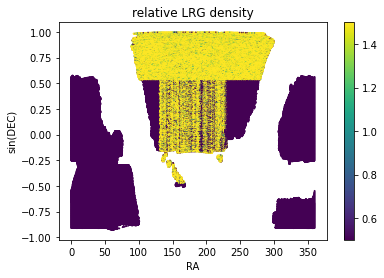

In [8]:
#look at LRG target density variations over full footprint
#this uses random file produced with targeting /global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/randoms/resolve/randoms*
#There are 10 of them, each conveniently with a density of 5000/deg2
#Make sure any mask bit and nobs cuts are consistent! (Some are applied at targeting to data samples, none to randoms)
densvar.plot_hpdens('LRG') #

4058927
4058927
4058927
4058927
102802203
97943958
92755252
92755252
randoms done


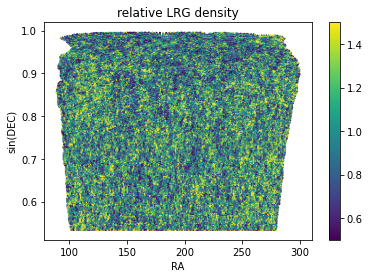

4058927
4058927
4058927
4058927
102802203
97943958
92755252
92755252
randoms done


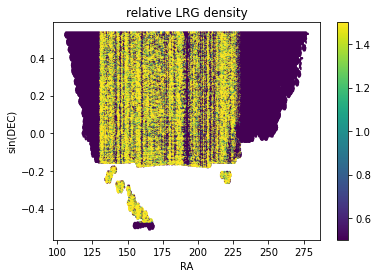

4058927
4058927
4058927
4058927
102802203
97943958
92755252
92755252
randoms done


/global/cscratch1/sd/forero/LSS/Sandbox/imaging/densvar.py:106: RuntimeWarning: invalid value encountered in true_divide
  od = od/np.mean(od)


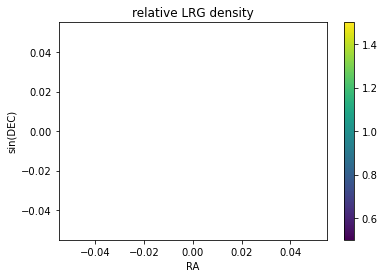

In [9]:
#look specifically at three regions: BASS/MzLS, DECaLS NGC, DECaLS SGC
densvar.plot_hpdens('LRG','N')
densvar.plot_hpdens('LRG','DN')
densvar.plot_hpdens('LRG','DS')

### See more at https://github.com/desihub/LSS/blob/master/Sandbox/imaging/examples.ipynb

## End-to-end simulations: Some early examples of what to expect from LSS catalogs

In [11]:
glob.glob(os.path.join(desi_root,'datachallenge/onepercent/catalogs/dark/*'))

['/global/cfs/cdirs/desi/datachallenge/onepercent/catalogs/dark/QSO_oneperztrue_clus.dat.fits',
 '/global/cfs/cdirs/desi/datachallenge/onepercent/catalogs/dark/targets_oneper_jmtl_jztrue.fits',
 '/global/cfs/cdirs/desi/datachallenge/onepercent/catalogs/dark/e2etiles_run9.fits',
 '/global/cfs/cdirs/desi/datachallenge/onepercent/catalogs/dark/QSO_oneper_clus.dat.fits',
 '/global/cfs/cdirs/desi/datachallenge/onepercent/catalogs/dark/e2etiles_run16.fits',
 '/global/cfs/cdirs/desi/datachallenge/onepercent/catalogs/dark/nbar_oneper_LRG.dat',
 '/global/cfs/cdirs/desi/datachallenge/onepercent/catalogs/dark/nbar_oneper_QSO.dat',
 '/global/cfs/cdirs/desi/datachallenge/onepercent/catalogs/dark/e2etiles_run12.fits',
 '/global/cfs/cdirs/desi/datachallenge/onepercent/catalogs/dark/randoms_mtl_cuttod.fits',
 '/global/cfs/cdirs/desi/datachallenge/onepercent/catalogs/dark/e2etiles_run1.fits',
 '/global/cfs/cdirs/desi/datachallenge/onepercent/catalogs/dark/QSO_oneper_clus.ran.fits',
 '/global/cfs/cdirs/

### The files with 'clus' in the names are meant to be used for clustering measurements

In [12]:
fd = fitsio.read(os.path.join(desi_root,'datachallenge/onepercent/catalogs/dark/LRG_oneper_clus.dat.fits'))

In [13]:
fd.dtype.names

('TARGETID', 'RA', 'DEC', 'Z', 'WEIGHT', 'NZ', 'WEIGHT_FKP')

### Those should be the minimal set of columns needed for 2pt statistics

In [15]:
fr = fitsio.read(os.path.join(desi_root,'datachallenge/onepercent/catalogs/dark/LRG_oneper_clus.ran.fits'))

In [16]:
fr.dtype.names

('TARGETID', 'RA', 'DEC', 'WEIGHT', 'Z', 'NZ', 'WEIGHT_FKP')

### Randoms files have the same columns

### Those files only include the galaxies that got good redshifts in the desired range
### 'full' files contain all targets that were identified as reachable by a positioner that later got a good spectrum
### they also contain all of the relative photometric and spectroscopic information that could possibly have been used to identify them as targets, good redshifts, and then have cuts applied to get to the clustering catalogs

In [17]:
fdf = fitsio.read(os.path.join(desi_root,'datachallenge/onepercent/catalogs/dark/LRG_oneper_full.dat.fits'))

In [18]:
fdf.dtype.names

('LOCATION',
 'FIBER',
 'TARGETID',
 'TILE',
 'TILELOCID',
 'PROGRAM',
 'NTILE',
 'RELEASE',
 'BRICKID',
 'BRICKNAME_mtl',
 'BRICK_OBJID',
 'MORPHTYPE',
 'RA',
 'DEC',
 'RA_IVAR',
 'DEC_IVAR',
 'DCHISQ',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_W3',
 'FLUX_W4',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_W3',
 'FLUX_IVAR_W4',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'MW_TRANSMISSION_W3',
 'MW_TRANSMISSION_W4',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'FRACFLUX_G',
 'FRACFLUX_R',
 'FRACFLUX_Z',
 'FRACMASKED_G',
 'FRACMASKED_R',
 'FRACMASKED_Z',
 'FRACIN_G',
 'FRACIN_R',
 'FRACIN_Z',
 'ALLMASK_G',
 'ALLMASK_R',
 'ALLMASK_Z',
 'WISEMASK_W1',
 'WISEMASK_W2',
 'PSFDEPTH_G',
 'PSFDEPTH_R',
 'PSFDEPTH_Z',
 'GALDEPTH_G',
 'GALDEPTH_R',
 'GALDEPTH_Z',
 'FRACDEV',
 'FRACDEV_IVAR',
 'SHAPEDEV_R',
 'SHAPEDEV_R_IVAR',
 'SHAPEDEV_E1',
 'SHAPEDEV_E1_IVAR',
 'SHAPED

### The TILELOCID information is unique the LSS catalogs. This combines the tile number and the fiber location. The same tilelocid can show up for multiple targets. Only one will get assigned. Each target can show up at multiple tilelocid; each is given either the first it shows up in or the one it was assigned in.
### FRACZ_TILELOCID then gives basically 1/N_TILELOCID

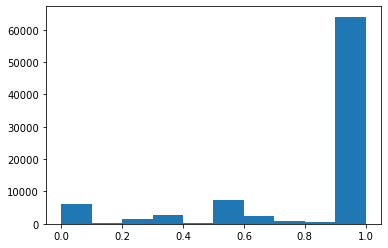

In [19]:
plt.hist(fdf['FRACZ_TILELOCID'])
plt.show()

### TILE info is stored as a string of all of the tiles a target hits, separated by '-'

In [20]:
nt = np.char.count(fdf['TILE'],'-')+1
print(np.unique(nt))

[1 2 3 4 5 6 7 8 9]


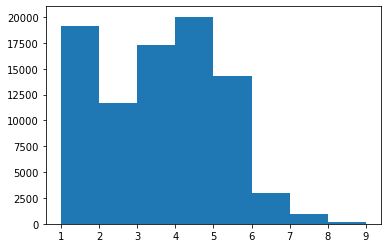

In [21]:
plt.hist(fdf['NTILE'],bins=8)
plt.show()

In [22]:
fdf['TILE'][:10]

array(['13342', '13342', '13342', '13342', '13342', '13342', '13342',
       '13342', '13342', '13342'], dtype='<U100')

In [23]:
frf = fitsio.read(os.path.join(desi_root,'datachallenge/onepercent/catalogs/dark/LRG_oneper_full.ran.fits'))

In [24]:
#the full randoms also have all of that info and then info they inheret from the imaging randoms
frf.dtype.names

('LOCATION',
 'FIBER',
 'TARGETID',
 'TILE',
 'TILELOCID',
 'PROGRAM',
 'NTILE',
 'RA',
 'DEC',
 'BRICKNAME',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'PSFDEPTH_G',
 'PSFDEPTH_R',
 'PSFDEPTH_Z',
 'GALDEPTH_G',
 'GALDEPTH_R',
 'GALDEPTH_Z',
 'PSFDEPTH_W1',
 'PSFDEPTH_W2',
 'PSFSIZE_G',
 'PSFSIZE_R',
 'PSFSIZE_Z',
 'APFLUX_G',
 'APFLUX_R',
 'APFLUX_Z',
 'APFLUX_IVAR_G',
 'APFLUX_IVAR_R',
 'APFLUX_IVAR_Z',
 'MASKBITS',
 'WISEMASK_W1',
 'WISEMASK_W2',
 'EBV',
 'PHOTSYS',
 'HPXPIXEL',
 'DESI_TARGET',
 'SV1_DESI_TARGET',
 'NUMOBS_INIT',
 'NUMOBS_MORE',
 'PRIORITY',
 'OBSCONDITIONS',
 'SUBPRIORITY')

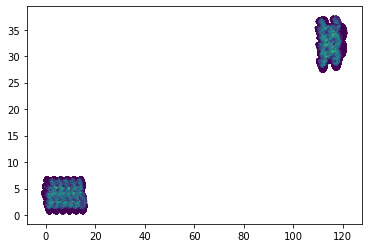

In [25]:
plt.scatter(frf['RA'],frf['DEC'],c=frf['NTILE'],s=.1)
plt.show()

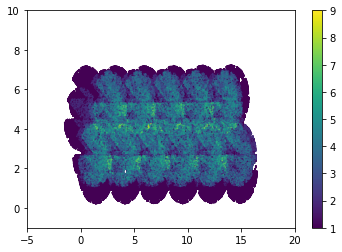

In [26]:
#zoom in on one of the regions
plt.scatter(frf['RA'],frf['DEC'],c=frf['NTILE'],s=.1)
plt.xlim(-5,20)
plt.ylim(-1,10)
plt.colorbar()
plt.show()

### jump to https://github.com/desihub/LSS/blob/master/Sandbox/xitools_e2e.py to get xi

## Smaller catalogs exist with !real! data
### /project/projectdirs/desi/users/ajross/catalogs/minisv2/LSScats
### Tiles are all isolated, so this is per tile and night observed

In [27]:
glob.glob(os.path.join(desi_root,'users/ajross/catalogs/minisv2/LSScats/*'))

['/global/cfs/cdirs/desi/users/ajross/catalogs/minisv2/LSScats/ELG70005_20200228_full.ran.fits',
 '/global/cfs/cdirs/desi/users/ajross/catalogs/minisv2/LSScats/QSO68000_20200314_full.dat.fits',
 '/global/cfs/cdirs/desi/users/ajross/catalogs/minisv2/LSScats/ELG70005_20200228_full.dat.fits',
 '/global/cfs/cdirs/desi/users/ajross/catalogs/minisv2/LSScats/LRG70002_20200304_full.dat.fits',
 '/global/cfs/cdirs/desi/users/ajross/catalogs/minisv2/LSScats/ELG70006_20200304_clustering.ran.fits',
 '/global/cfs/cdirs/desi/users/ajross/catalogs/minisv2/LSScats/ELG70006_20200304_clustering.dat.fits',
 '/global/cfs/cdirs/desi/users/ajross/catalogs/minisv2/LSScats/ELG70005_20200219_full.ran.fits',
 '/global/cfs/cdirs/desi/users/ajross/catalogs/minisv2/LSScats/ELG70005_20200220_full.dat.fits',
 '/global/cfs/cdirs/desi/users/ajross/catalogs/minisv2/LSScats/LRG68001_20200315_full.ran.fits',
 '/global/cfs/cdirs/desi/users/ajross/catalogs/minisv2/LSScats/LRG70003_20200224_full.dat.fits',
 '/global/cfs/cdir

In [29]:
fr = fitsio.read(os.path.join(desi_root,'users/ajross/catalogs/minisv2/LSScats/ELG67142_20200315_clustering.ran.fits'))

In [30]:
fr.dtype.names

('RA', 'DEC', 'Z', 'WEIGHT')

In [31]:
fd = fitsio.read(os.path.join(desi_root,'users/ajross/catalogs/minisv2/LSScats/ELG67142_20200315_clustering.dat.fits'))

In [32]:
fd.dtype.names

('RA', 'DEC', 'Z', 'WEIGHT')

In [33]:
frf = fitsio.read(os.path.join(desi_root,'users/ajross/catalogs/minisv2/LSScats/ELG67142_20200315_full.ran.fits'))

In [34]:
frf.dtype.names

('TARGETID',
 'LOCATION',
 'FIBER',
 'TARGET_RA',
 'TARGET_DEC',
 'FA_TARGET',
 'FA_TYPE',
 'RA',
 'DEC',
 'BRICKNAME',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'PSFDEPTH_G',
 'PSFDEPTH_R',
 'PSFDEPTH_Z',
 'GALDEPTH_G',
 'GALDEPTH_R',
 'GALDEPTH_Z',
 'PSFDEPTH_W1',
 'PSFDEPTH_W2',
 'PSFSIZE_G',
 'PSFSIZE_R',
 'PSFSIZE_Z',
 'APFLUX_G',
 'APFLUX_R',
 'APFLUX_Z',
 'APFLUX_IVAR_G',
 'APFLUX_IVAR_R',
 'APFLUX_IVAR_Z',
 'MASKBITS',
 'WISEMASK_W1',
 'WISEMASK_W2',
 'EBV',
 'PHOTSYS',
 'HPXPIXEL',
 'DESI_TARGET',
 'SV1_DESI_TARGET',
 'Z',
 'PRIORITY')

In [35]:
fdf = fitsio.read(os.path.join(desi_root,'users/ajross/catalogs/minisv2/LSScats/ELG67142_20200315_full.dat.fits'))

In [36]:
fdf.dtype.names

('TARGETID',
 'FIBER',
 'LOCATION',
 'NUMOBS_MORE',
 'RELEASE',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'MORPHTYPE',
 'RA',
 'RA_IVAR',
 'DEC',
 'DEC_IVAR',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'FRACFLUX_G',
 'FRACFLUX_R',
 'FRACFLUX_Z',
 'FRACMASKED_G',
 'FRACMASKED_R',
 'FRACMASKED_Z',
 'FRACIN_G',
 'FRACIN_R',
 'FRACIN_Z',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'PSFDEPTH_G',
 'PSFDEPTH_R',
 'PSFDEPTH_Z',
 'GALDEPTH_G',
 'GALDEPTH_R',
 'GALDEPTH_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_W3',
 'FLUX_W4',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_W3',
 'FLUX_IVAR_W4',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'MW_TRANSMISSION_W3',
 'MW_TRANSMISSION_W4',
 'ALLMASK_G',
 'ALLMASK_R',
 'ALLMASK_Z',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'REF_EPOCH',
 'WISEMASK_W1',
 'WISEMASK_W2',
 'MASKBITS',
 'FRACDEV',
 

### You can see above, similar (but more restricted) data model

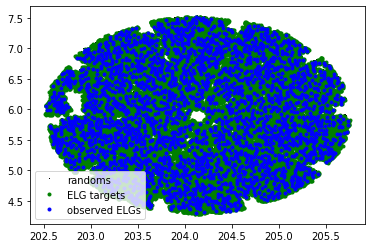

In [37]:
plt.plot(fr['RA'],fr['DEC'],'k,',label='randoms')
plt.plot(fdf['RA'],fdf['DEC'],'g.',label='ELG targets')
plt.plot(fd['RA'],fd['DEC'],'b.',label='observed ELGs')
plt.legend()
plt.show()

### jump to https://github.com/desihub/LSS/blob/master/Sandbox/xitools_minisv.py to get xi